In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

from astroML.datasets import fetch_sdss_galaxy_colors
from astroML.plotting import scatter_contour


###  下载SDSS数据

fetch_sdss_galaxy_colors()  向SDSS CASjobs服务器查询50,000个星系的颜色。

In [12]:
n_neighbors = 1

data = fetch_sdss_galaxy_colors()

N = len(data)
print('向SDSS CASjobs服务器查询 {} 个星系的颜色'.format(N))

# 打乱数据
np.random.seed(0)
np.random.shuffle(data)

向SDSS CASjobs服务器查询 50000 个星系的颜色


In [14]:
# 查询umpy.ndarray数据前5行
data[:5]  

array([(18.81836, 17.19553, 16.34057, 15.88204, 15.53991, 'GALAXY', 0.09472404, 2.644018e-05),
       (18.14123, 16.85637, 16.24886, 15.88826, 15.65861, 'GALAXY', 0.07279737, 1.083266e-05),
       (19.1816 , 17.46467, 16.71514, 16.32759, 16.05579, 'GALAXY', 0.07645394, 3.658800e-05),
       (19.32642, 17.64866, 16.74466, 16.29075, 15.9383 , 'GALAXY', 0.07962465, 2.044412e-05),
       (19.01849, 17.99281, 17.64551, 17.41392, 17.2306 , 'GALAXY', 0.03278003, 1.609978e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('specClass', '<U6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

###  把不同颜色通道，分别放到X矩阵中

In [15]:
# put colors in a matrix
X = np.zeros((N, 4))
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['redshift']

### 分训练集 测试集

In [16]:
# divide into training and testing data
Ntrain = N // 2
Xtrain = X[:Ntrain]
ztrain = z[:Ntrain]

Xtest = X[Ntrain:]
ztest = z[Ntrain:]

### 用K近邻(回归)KNeighborsRegressor进行回归预测

In [17]:
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
zpred = knn.fit(Xtrain, ztrain).predict(Xtest)

axis_lim = np.array([-0.1, 2.5])

rms = np.sqrt(np.mean((ztest - zpred) ** 2))
print("RMS error = %.2g" % rms)

RMS error = 0.28


### 画图

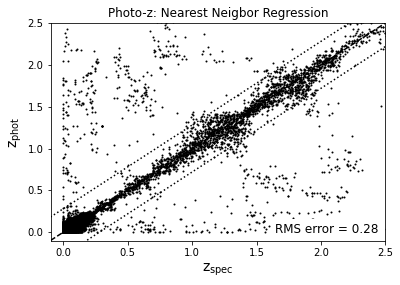

In [18]:
ax = plt.axes()
plt.scatter(ztest, zpred, c='k', lw=0, s=4)
plt.plot(axis_lim, axis_lim, '--k')
plt.plot(axis_lim, axis_lim + rms, ':k')
plt.plot(axis_lim, axis_lim - rms, ':k')
plt.xlim(axis_lim)
plt.ylim(axis_lim)

plt.text(0.98, 0.02, "RMS error = %.2g" % rms,
         ha='right', va='bottom', transform=ax.transAxes,
         bbox=dict(ec='w', fc='w'), fontsize=12)

plt.title('Photo-z: Nearest Neigbor Regression')
plt.xlabel(r'$\mathrm{z_{spec}}$', fontsize=14)
plt.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14)
plt.show()